In [1]:
MASTER_DIR = "/Users/tianyudu/Documents/UToronto/Course/ECO499/ugthesis"
FIGURE_DIR = "/Users/tianyudu/Documents/UToronto/Course/ECO499/ugthesis/figures/wti_sumary"

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib.dates as dates

from scipy.stats import moment

from datetime import datetime

plt.style.use("grayscale")

In [3]:
raw = pd.read_csv(MASTER_DIR + "/data/ravenpack/crude_oil_all.csv")
df = raw.copy()

In [4]:
df.head()

,TIMESTAMP_UTC,RPNA_DATE_UTC,RPNA_TIME_UTC,RP_ENTITY_ID,ENTITY_TYPE,ENTITY_NAME,POSITION_NAME,RP_POSITION_ID,COUNTRY_CODE,RELEVANCE,...,G_ENS_SIMILARITY_GAP,G_ENS_KEY,G_ENS_ELAPSED,EVENT_SIMILARITY_KEY,NEWS_TYPE,SOURCE,RP_STORY_ID,RP_STORY_EVENT_INDEX,RP_STORY_EVENT_COUNT,PRODUCT_KEY
0,2000-01-01 10:08:00.000,20000101,10:08:00.000,FD9CFE,CMDT,Crude Oil,NaN,NaN,XX,100,...,0.00000,765AA7AB5BF56293D1849B82B14533BB,0,4E59863BBB2CB48F58809D319047702A,NEWS-FLASH,B5569E,3F3083D8BBC9731C0F37EBA7F1AB3192,2,2,DJ-GM
1,2000-01-01 10:08:00.000,20000101,10:08:00.000,FD9CFE,CMDT,Crude Oil,NaN,NaN,XX,100,...,0.00000,765AA7AB5BF56293D1849B82B14533BB,0,4E59863BBB2CB48F58809D319047702A,NEWS-FLASH,B5569E,765AA7AB5BF56293D1849B82B14533BB,2,2,DJ-GM
2,2000-01-03 07:00:00.000,20000103,07:00:00.000,FD9CFE,CMDT,Crude Oil,NaN,NaN,XX,100,...,5.02083,183E1A9B074070F5E794483D4DFE66FA,0,6A5CE8F078AA1954083E870CA70828F9,FULL-ARTICLE,18A55F,183E1A9B074070F5E794483D4DFE66FA,1,1,DJ-GM
3,2000-01-04 05:00:00.000,20000104,05:00:00.000,FD9CFE,CMDT,Crude Oil,NaN,NaN,XX,100,...,0.91667,183E1A9B074070F5E794483D4DFE66FA,79200000,6A5CE8F078AA1954083E870CA70828F9,FULL-ARTICLE,18A55F,C16D093C381A7FF580D438CF66F41779,1,1,DJ-GM
4,2000-01-04 07:46:00.000,20000104,07:46:00.000,FD9CFE,CMDT,Crude Oil,NaN,NaN,XX,100,...,42.19375,637F73A1EEB28EFDA918BA130E4BE237,0,510BBC6D3AF663EFB6A0B84717A44ED3,NEWS-FLASH,B5569E,637F73A1EEB28EFDA918BA130E4BE237,1,1,DJ-GM


In [5]:
# convert data format
time = df.TIMESTAMP_UTC.apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S.%f"))
df.insert(loc=0, column="UTC", value=time)
df.insert(loc=1, column="DAY", value=df.UTC.dt.day_name())

In [6]:
YEAR_RANGE = [str(y) for y in range(2000, 2020)]
DAYS = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Table: year by year

In [8]:
def _summary(values: np.ndarray) -> None:
    # Compute stats
    mean = np.mean(values)
    median = np.median(values)
    std = np.std(values)
    _min, _max = np.min(values), np.max(values)
    moment_3 = moment(values, 3) / (std ** 3)
    moment_4 = moment(values, 4) / (std ** 4) - 3
    # Report
    return f"{year} & {mean:0.3f} & {median:0.3f} & {std:0.3f} & {_min:0.3f} & {_max:0.3f} & {moment_3:0.3f} & {moment_4:0.3f}\\\\"

In [9]:
for year in YEAR_RANGE:
    mask = (df.UTC.apply(lambda x: datetime.strftime(x, format="%Y")) == year)
    subset = df[mask]
    num_news = subset.groupby("RPNA_DATE_UTC").size()
    print(_summary(num_news.values))

2000 & 10.990 & 10.000 & 7.883 & 1.000 & 48.000 & 1.274 & 2.331\\
2001 & 14.929 & 14.000 & 9.225 & 1.000 & 51.000 & 0.624 & 0.549\\
2002 & 4.807 & 4.000 & 3.452 & 1.000 & 19.000 & 1.472 & 2.645\\
2003 & 6.519 & 4.000 & 6.241 & 1.000 & 39.000 & 1.969 & 5.155\\
2004 & 24.608 & 23.000 & 16.612 & 1.000 & 84.000 & 0.696 & 0.437\\
2005 & 20.921 & 21.000 & 12.480 & 1.000 & 57.000 & 0.344 & -0.061\\
2006 & 21.375 & 21.000 & 13.224 & 1.000 & 58.000 & 0.135 & -0.628\\
2007 & 19.695 & 18.000 & 12.724 & 1.000 & 66.000 & 0.524 & 0.074\\
2008 & 22.264 & 23.000 & 14.481 & 1.000 & 66.000 & 0.255 & -0.394\\
2009 & 16.642 & 16.000 & 10.145 & 1.000 & 48.000 & 0.220 & -0.536\\
2010 & 17.373 & 18.000 & 10.704 & 1.000 & 52.000 & 0.182 & -0.546\\
2011 & 22.252 & 23.000 & 12.838 & 1.000 & 65.000 & 0.164 & -0.179\\
2012 & 22.679 & 23.000 & 13.582 & 1.000 & 65.000 & 0.131 & -0.375\\
2013 & 17.048 & 17.000 & 10.419 & 1.000 & 57.000 & 0.359 & 0.002\\
2014 & 16.193 & 13.000 & 13.162 & 1.000 & 69.000 & 1.506 & 2.58

# Table: day of week summary

In [193]:
def _day_of_week_summary(
    df: pd.DataFrame,
    complete: bool = False
) -> str:
    result = list()
    for day in DAYS:
        mask = (df.DAY == day)
        subset = df[mask]
        num_news = subset.groupby("RPNA_DATE_UTC").size()
        mean = np.mean(num_news)
        result.append(mean)
    return result

In [194]:
# Print in latex format
print("Year & " + " &".join(DAYS))
for year in YEAR_RANGE:
    mask = (df.UTC.apply(lambda x: datetime.strftime(x, format="%Y")) == year)
    summary = _day_of_week_summary(df[mask])
    report = year + " &" + " &".join(f"{x: 0.3f}" for x in summary) + " \\\\"
    print(report)

Year & Monday &Tuesday &Wednesday &Thursday &Friday &Saturday &Sunday
2000 & 11.157 & 14.135 & 13.077 & 11.885 & 9.769 & 1.643 & 1.500 \\
2001 & 12.547 & 17.569 & 21.327 & 15.058 & 14.078 & 1.000 & 1.200 \\
2002 & 5.771 & 5.019 & 5.224 & 3.980 & 5.469 & 1.200 & 1.600 \\
2003 & 7.080 & 6.529 & 9.942 & 6.863 & 5.490 & 1.200 & 1.136 \\
2004 & 24.058 & 28.981 & 39.250 & 28.660 & 22.302 & 2.182 & 2.240 \\
2005 & 21.462 & 21.846 & 33.596 & 24.654 & 19.000 & 1.765 & 2.259 \\
2006 & 22.981 & 24.885 & 35.904 & 24.846 & 19.731 & 1.346 & 2.161 \\
2007 & 19.792 & 21.385 & 33.577 & 23.846 & 16.769 & 1.941 & 2.212 \\
2008 & 24.788 & 26.415 & 36.415 & 26.269 & 25.250 & 2.207 & 3.065 \\
2009 & 16.058 & 21.346 & 29.192 & 16.925 & 15.538 & 1.688 & 2.366 \\
2010 & 16.327 & 23.058 & 28.654 & 20.596 & 17.135 & 2.261 & 2.932 \\
2011 & 23.769 & 28.577 & 32.904 & 25.750 & 19.942 & 2.053 & 3.441 \\
2012 & 22.340 & 26.654 & 36.423 & 26.981 & 25.118 & 3.783 & 2.756 \\
2013 & 16.673 & 19.642 & 28.588 & 19.038 & 1

# Figure: average by calendar days.

In [199]:
# Group by days.
fi = df.UTC.apply(lambda x: datetime.strftime(x, format="%m-%d"))
year_index = df.UTC.apply(lambda x: datetime.strftime(x, format="%Y"))
daily_average = dict()
for day in set(fi):
    day_mask = (fi == day)
    if "2019" in set(df[fi == p].RPNA_DATE_UTC.apply(lambda x: str(x)[:4])):
        denom = 20
    else:
        denom = 19
    # choose this day
    daily_average[day] = len(df[day_mask]) / denom

In [200]:
df_daily_avg = pd.Series(daily_average)

In [201]:
# All case to 2000.
df_daily_avg.index = pd.to_datetime("2000-" + df_daily_avg.index, format="%Y-%m-%d")
df_daily_avg.sort_index(inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tianyudu/Documents/UToronto/Course/ECO499/ugthesis/figures/wti_sumary/daily_average.png'

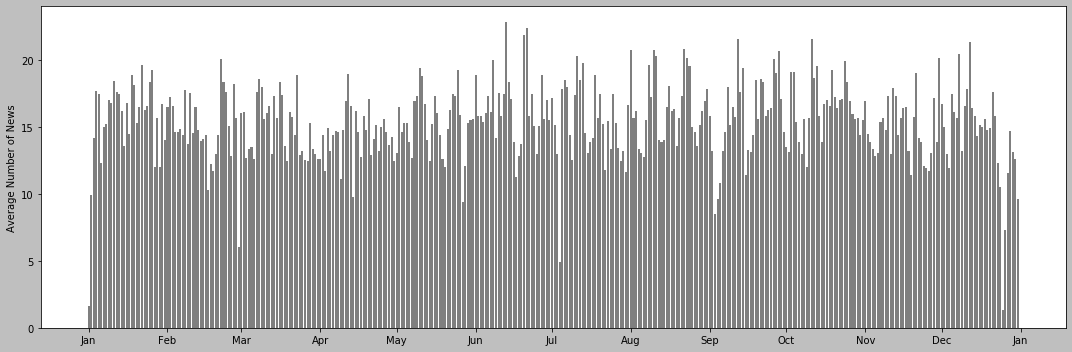

In [202]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(df_daily_avg.index, df_daily_avg.values, alpha=0.5)
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%b"))
ax.set_ylabel("Average Number of News")
plt.tight_layout()
plt.savefig(FIGURE_DIR + "/daily_average.png", dpi=300, bbox_inches="tight")
plt.show()